In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('D:\Real_estate_valuation_data_set.xlsx')

In [4]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [27]:
missing_values = df.isnull().sum()

In [28]:
missing_values

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
print(df.dtypes)

X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


In [8]:
df.rename(columns={'X1 transaction date':'Transaction date', 'X2 house age':'House age',
                   'X3 distance to the nearest MRT station':'Distance to the nearest MRT station',
                   'X4 number of convenience stores':'Number of convenience stores',
                   'X5 latitude':'Latitude', 'X6 longitude':'Longitude', 
                  'Y house price of unit area':'House price of unit area'})

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
features = list(df.columns.drop(labels=['X1 transaction date','X5 latitude','X6 longitude','Y house price of unit area']))
features

['X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores']

In [10]:
X = df[features]
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5
...,...,...,...
409,13.7,4082.01500,0
410,5.6,90.45606,9
411,18.8,390.96960,7
412,8.1,104.81010,5


In [11]:
y = df['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [12]:
LinReg_model = LinearRegression()

In [13]:
LinReg_model.fit(X.values,y)
LinReg_model.score(X.values,y)

0.5410632980005723

In [14]:
predicted = LinReg_model.predict([[10,905,2]])
predicted

array([38.17550058])

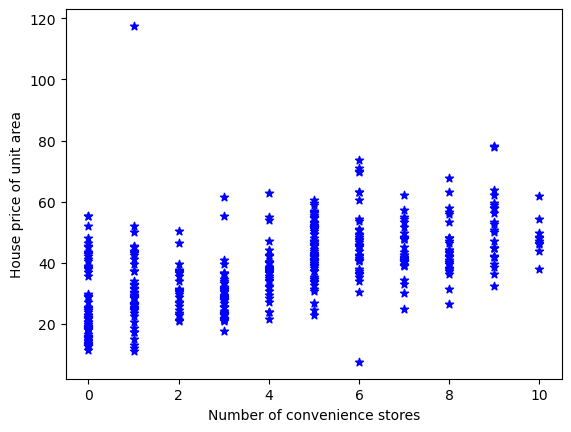

In [15]:
%matplotlib inline
plt.xlabel('Number of convenience stores')
plt.ylabel('House price of unit area')
plt.scatter(df['X4 number of convenience stores'], df['Y house price of unit area'], color='blue', marker='*')

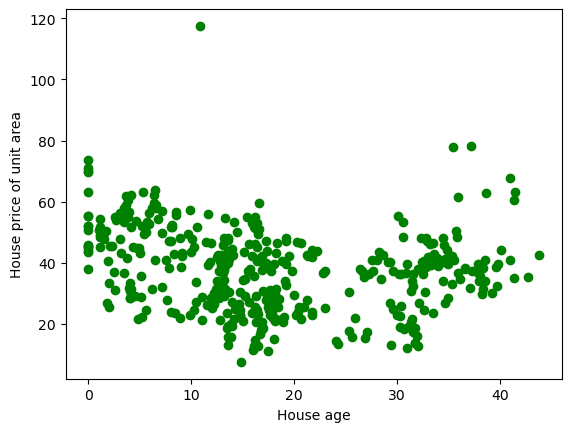

In [35]:
plt.xlabel('House age')
plt.ylabel('House price of unit area')
plt.scatter(df['X2 house age'], df['Y house price of unit area'], color='green', marker='o')
#plt.plot(df['X2 house age'], df['Y house price of unit area'], color='yellow')

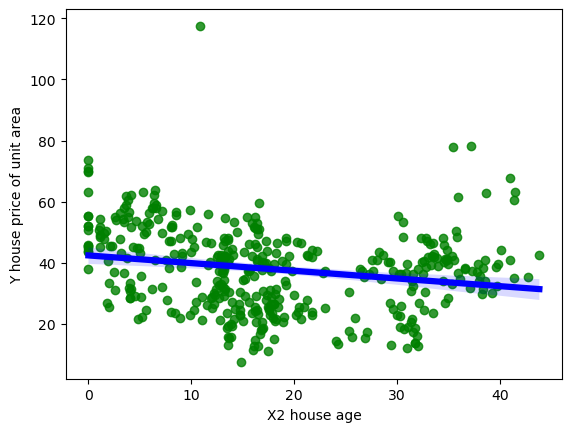

In [63]:
import seaborn as sns
sns.regplot(x=df['X2 house age'],
            y=df['Y house price of unit area'],
            scatter_kws={'color': 'green'}, 
            line_kws={'color': 'blue', 'linewidth':4.5})

# Настройка графика

# Отображение графика
plt.show()

In [17]:
df.shape

(414, 7)

In [18]:
coefficients = LinReg_model.coef_
coefficients #  коэффициент(ы) k: y = kx+b; но у нас тут несколько признаков (фичей), поэтому и коэффов несколько
# сколько признаков, столько и коэффициентов:
# например: 2482 признаков - 2482 коэффициентов и т.д.

array([-0.25285583, -0.00537913,  1.29744248])

In [19]:
LinReg_model.intercept_ #  коэффициент b
# то есть уравнение такое: 
# y = w0 + w1x1 + w2x2 + w3x3, или:
# y = 42.97 - 0.25x1 - 0.005x2 + 1.29x3


42.9772862060641

In [60]:
# проходимся по циклу для вывода всех обозначений коэффициентов (весов) и их значений соответственно
for i, coef in enumerate(coefficients, start=1):
    print('Coefficient {} is for w{}'.format(coef, i))

Coefficient -0.25285582658775596 is for w1
Coefficient -0.005379129623944099 is for w2
Coefficient 1.297442476101934 is for w3


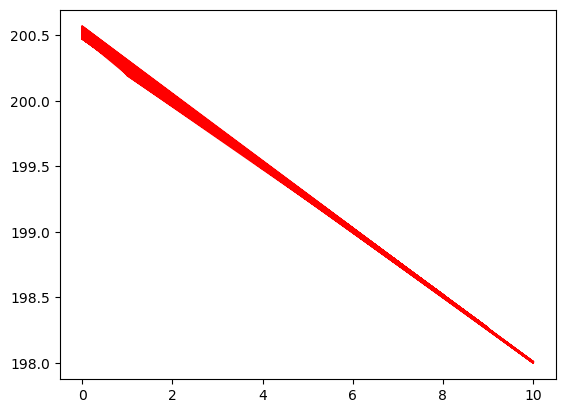

In [26]:
plt.plot(df['X4 number of convenience stores'], LinReg_model.predict(df[['X4 number of convenience stores','X5 latitude','X6 longitude']].values),
         color='red')

In [22]:
# как алгоритм (библиотека) считает:

In [23]:
-0.25285582658775596*10-0.005379129623944099*905+1.297442476101934*2 + 42.9772862060641

38.175500582721

In [24]:
38.175500582721 == predicted
# predicted = LinReg_model.predict([[10,905,2]])

array([ True])

In [25]:
#LinReg_model.score()